(23.0, 23.0)
(25.0, 32.0)
(24.2, 31.5)
(22.0, 34.0)
(20.5, 34.0)
Test samples with (width, height): (25.0, 32.0) classified as Pikachu
Test samples with (width, height): (24.2, 31.5) classified as Pikachu
Test samples with (width, height): (22.0, 34.0) classified as Pikachu
Test samples with (width, height): (20.5, 34.0) classified as Pichu


Your sample with (width, height): (23.0, 23.0) is classified as Pichu




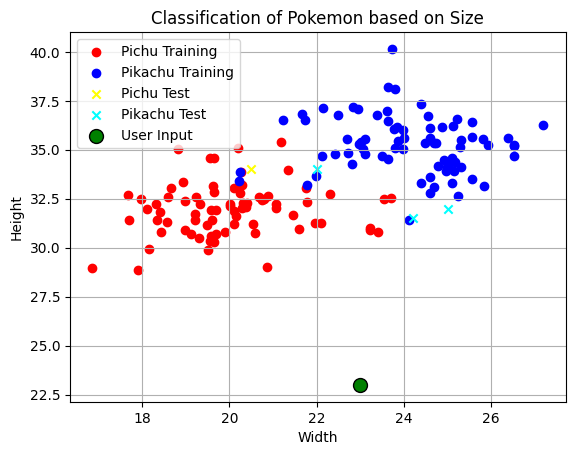

In [19]:
import matplotlib.pyplot as plt

# Promt the user with widght and height.
# Return the corrdinates as a tuples of floats
def input_from_user():
    while True:
        try:
            height = float(input("Enter height: "))
            wight = float(input("Enter wight: "))
            if height <= 0 or wight <= 0:
                print("Enter a positive number for both height and wight")
                continue
            return height, wight
        except ValueError:
            print("Enter a number!")
        
    
# Read in the datapoints from a txt file and skip the header
def read_datapoints(datapoint):
    with open(datapoint, "r") as f:
        data = f.readlines()[1:]
    return [process_data_points(point) for point in data ]

#  Split the in three and convret them in to floats or int
def process_data_points(point):   
    x, y, label = point.split(",")
    return float(x), float(y), int(label) #took insparation from https://stackoverflow.com/questions/63428080/efficient-way-to-split-and-map-float-function-on-a-string-of-points

# Read in the testpoints from a txt file and skip header
def read_testpoints(testpoints):
    with open(testpoints, "r") as f:
        data = f.readlines()[1:]
    return [process_test_point(point) for point in data] 

# split testpoints into two and start with ( and ends with )
def process_test_point(point):
    x_str, y_str = point.split(",")
    x = float(x_str.split("(")[1])
    y = float(y_str.split(")")[0])
    return x, y # #took insparation from https://stackoverflow.com/questions/63428080/efficient-way-to-split-and-map-float-function-on-a-string-of-points

# Function to calculate distance between 2 points
def distance(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

# Function to classify a point
def classify(point):
    print(point)
    distances = [(distance(point, datapoint), datapoint[2]) for datapoint in datapoints]
    distances.sort(key=lambda x: x[0]) # inspartion from here https://stackoverflow.com/questions/16310015/what-does-this-mean-key-lambda-x-x1
    nearest_10 = distances[:10]
    pichus = sum(1 for d in nearest_10 if d[1] == 0)
    pikachus = 10 - pichus
    return 0 if pichus > pikachus else 1

# Import and assign data from txt files to variables
testpoints = read_testpoints("testpoints.txt")
datapoints = read_datapoints("datapoints.txt")

# Runs input throught classify function
user_points = input_from_user()
result = classify(user_points)

# Classify the testpoints from the file
results = [classify(testpoint) for testpoint in testpoints]

# Generate the output for each test point
output_strings = []
for testpoint, result in zip(testpoints, results):
    classification = "Pikachu" if result == 1 else "Pichu"
    output_strings.append(f"Test samples with (width, height): {testpoint} classified as {classification}")

# Prints the results of the testpoints.txt file
print("\n".join(output_strings))

print("\n")
# Prints the results of the input
classification = "Pikachu" if result == 1 else "Pichu"
print(f"Your sample with (width, height): {user_points} is classified as {classification}")

print("\n")

def data_plots(datapoints, testpoints, user_input, results):
    pichus = [point for point, label in zip(datapoints, [point[2] for point in datapoints]) if label == 0]
    pikachus = [point for point, label in zip (datapoints, [point[2] for point in datapoints]) if label == 1]

    test_pichus = [point for point, label in zip(testpoints, results) if label == 0]
    test_pikachus = [point for point, label in zip (testpoints, results) if label == 1]

    plt.scatter([point[0] for point in pichus], [point[1] for point in pichus], color='red', label='Pichu Training')
    plt.scatter([point[0] for point in pikachus], [point[1] for point in pikachus], color='blue', label='Pikachu Training')
    plt.scatter([point[0] for point in test_pichus], [point[1] for point in test_pichus], color='yellow', marker='x', label='Pichu Test')
    plt.scatter([point[0] for point in test_pikachus], [point[1] for point in test_pikachus], color='cyan', marker='x', label='Pikachu Test')
    plt.scatter(user_points[0], user_points[1], color='green', marker='o', s=100, edgecolors='black', label='User Input')

    plt.legend(loc='upper left')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Classification of Pokemon based on Size')
    plt.grid(True)
    plt.show()

# Plot the points
data_plots(datapoints, testpoints, user_points, results)